# Etape
$-----$

$>$ 1st

* convert csv to siam file
* load data to x and y
* add ones to matrix x
* weight initiaalisation
* optimaiser
* accuarcy - presision

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import random 
import pandas as pd

# convert csv to siam

In [81]:
# La fonction qui convertit un fichier de format(.csv) en un format(.siam)
def csvTosiam(file_X,file_Y,file_siam):
    with open(file_X, "r") as my_input_file_x:
        x = [[int(i) for i in row.split(",")] for row in my_input_file_x]
        n = len(x[0])
        m = len(x)
        c = 28
        
    with open(file_Y,"r") as my_input_file_y:
        y=[int(i) for i in my_input_file_y]
        
    with open(file_siam,"w") as my_output_file:
        print(m, file = my_output_file)
        print(n, file = my_output_file)
        print(c, file = my_output_file)
        for i in range(m):
            for j in range(n):
                my_output_file.write(str(x[i][j]) + "\t")
            my_output_file.write(str(y[i]) + "\n")
    

# load data to x and y

In [82]:
#La fonction qui lit les données à partir d'un fichier (.siam)
def loadSiamDataFile(file_name):
    with open(file_name, "r") as my_input_file:
        m=int(my_input_file.readline())
        n=int(my_input_file.readline())
        c=int(my_input_file.readline())
        
        X = [[int(i) for i in row.split()] for row in my_input_file]
        
    x = np.array([[X[i][j] for j in range(n)]for i in range(m)])
    
    y = np.array([X[i][n] for i in range(m)])
    
    return x,y,m,n

In [83]:
csvTosiam("csvTrainImages.csv","csvTrainLabel.csv","train.siam")
# csvTosiam("csvTestImages.csv","csvTestLabel.csv","train.siam")

In [84]:
x1,y1,m1,n = loadSiamDataFile("train.siam")
y=np.resize(y1,(len(y1),1))

In [85]:
def one_hot(y):
    table = np.zeros((y.shape[0], 28))
    for i in range(y.shape[0]):
        table[i][int(y[i][0])-1] = 1 
    return table


In [86]:
y1=one_hot(y)

In [87]:
y1=y1.T

In [88]:
def normalize(x): 
    x = x / 255
    return x 

In [89]:
x1=normalize(x1)

In [90]:
x1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# shape real is for train
* x1 (13440,1024)
* y1(13440,1)
* m=13440
* n=1024

In [91]:
print("x1 =",x1.shape)
print("y1 =",y1.shape)
print("m1 =",m1)
print("n =",n)

x1 = (13440, 1024)
y1 = (28, 13440)
m1 = 13440
n = 1024


In [92]:
#La fonction qui ajoute une colonne des uns à un tableau
def addones(x):
    X = np.ones((len(x),len(x[0])+1))
    for i in range(len(X)):
        for j in range(1,len(X[0])):
            X[i][j] = x[i][j-1]
    return X

In [93]:
X=addones(x1).T

In [94]:
X

array([[1., 1., 1., ..., 1., 1., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [95]:
X.shape

(1025, 13440)

# initialisation the weight

* w1 =(c,n+1)   ==> (nombre des nuron de la couche de hiden , 1025) 

* w2 =(c,n+1)   ==> (nombre des nuron de la couche de sortie , nombre des nuron de la couche de hiden)

* x =(n+1,1)    ==> (1025,13440) entre

* z1 = np.dot(w1,x1)  shape ==> (nombre des nuron de la couche de hiden , 13440)

* a1 = relu(z)  shape ==> (nombre des nuron de la couche de hiden , 13440)

* z2 = np.dot(w2,a) shape ==> (nombre des nuron de la couche de sortie , 13440)

* a2 = softmax(z2) shape ==> (nombre des nuron de la couche de sortie , 13440)

In [96]:
#Fonction pour l'initialisation des poids
def init_weights(n_line,c_column, zeros = False):
    if zeros: # initialisation à des valeurs nulles    
        w = np.zeros(n_line,c_column)
    else: # initialisation par des valeurs aléatoires    
        w = np.random.randn(n_line,c_column) #(n,1): shape
    return w

In [97]:
# numbre of nuron in hiden lyaer is 100
w1=init_weights(256,X.shape[0], zeros = False) #weight Entre Layer
# number of nuron in the last layer is 
w2=init_weights(y1.shape[0],w1.shape[0], zeros = False) #weight hiden layer

In [98]:
w1.shape,w2.shape

((256, 1025), (28, 256))

In [99]:
w2

array([[ 1.39761023,  1.53020587,  0.05455779, ..., -0.38401776,
         0.65537689,  0.55109601],
       [ 0.64762604, -1.60215353,  0.89809339, ..., -0.28285229,
         0.13108048,  1.67870094],
       [-0.19288973, -0.08734069,  1.43605551, ...,  0.82394995,
        -1.01292701,  0.18600865],
       ...,
       [ 0.44479508,  1.21684285,  0.27224547, ...,  0.58627362,
        -0.05419805,  1.00761385],
       [-2.27356355,  0.4982143 , -1.43456735, ..., -0.71558156,
         0.882648  ,  0.84263041],
       [ 0.35992994,  1.40132408, -0.78077139, ..., -0.22801627,
         0.50727587, -0.85910996]])

# Note
*-----------------------------------------------------------------------------------------------------------------*

$z =w.x$

$a=softmax(z)$

$da = \frac{-y}{a}$

$dz = {a}-{y}$

$dw = {(a}-{y)}.*{x}$

*-----------------------------------------------------------------------------------------------------------------*

In [100]:

# np.random.seed(136)
# shuffle_index = np.random.permutation(m1)
# X, y1 = X[:,shuffle_index], y1[:,shuffle_index]

In [101]:
def ReLU_act(x, der=False):
    import numpy as np
    
    if (der == True): # the derivative of the ReLU is the Heaviside Theta
        f = np.heaviside(x, 1)
    else :
        f = np.maximum(x, 0)
    
    return f

def softmax(z):
    z = z - np.max(z, axis = 1).reshape(z.shape[0],1)
    return np.exp(z) / np.sum(np.exp(z), axis = 1).reshape(z.shape[0],1)


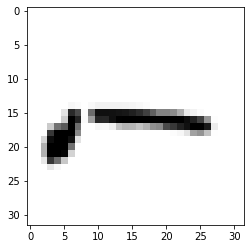

In [102]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

i = 1
plt.imshow(X[1:,i].reshape(32,32), cmap = matplotlib.cm.binary)
# plt.axis("off")
plt.show()
# print(np.argmax(y1[:,i])+1)
# print(y1[:,i])

In [103]:
def compute_loss(a,y):
    m1=X.shape[1]
    L = -(1/m1) * ( np.sum(y*np.log10(a, out=a, where=a > 0)) ) 

    return L

In [142]:
def gradient_descent_stochastique(X, y1,w1,w2, alpha = 0.00002,tmax=300):#0.00000001 #0.0000000001
    Jw=[]
    ep=[]
    m1=X.shape[1] # 13

    
    for i in range(tmax):
        #shuffle data
        shuffle_index = np.random.permutation(m1)
        X, y1 = X[:,shuffle_index], y1[:,shuffle_index] 
        #forward prop
        Z1=np.dot(w1,X)
        A1=ReLU_act(Z1, der=False)
        Z2=np.dot(w2,A1)
        A2=softmax(Z2)

        #cost fun
        cost = compute_loss(A2, y1)

        #backpropagation
        dZ2 = A2-y1
        dw2 = (1/m1) * np.dot(dZ2, A1.T)
        dZ1 = (1/m1) * np.dot(w2.T, dZ2) *  ReLU_act(A1, der=True)
        dw1 = (1/m1) * np.dot(dZ1, X.T)

        #updating the weight
        w2 = w2 - alpha * dw2
        w1 = w1 - alpha * dw1

        #add cost
        Jw.append(cost) # Jw[t]
        ep.append(i)
        if i % 10 == 0:
            print(f"epoch {i} == cost {cost}")

    return w1,w2, Jw,cost,ep

In [139]:
w1,w2, Jw,cost,ep= gradient_descent_stochastique(X, y1, w1,w2) 

# Affichage des résultats produits par la fonction gradient_descent
print('w1 final =', w1)
# print('w2 final =', w2)
print('Jw initial =', Jw[0])

epoch 0 == cost 118.24652465945158
epoch 10 == cost 119.62537064604336
epoch 20 == cost 121.05494982270906
epoch 30 == cost 122.53080371469274
epoch 40 == cost 124.06868739696993
epoch 50 == cost 125.66419657435986
epoch 60 == cost 127.30153026457567
epoch 70 == cost 129.05350178667908
epoch 80 == cost 130.95515707886548
epoch 90 == cost 132.92248883304262
epoch 100 == cost 134.9637966449851
epoch 110 == cost 137.07680103255268
epoch 120 == cost 139.23935927855814
epoch 130 == cost 141.44751382315008
epoch 140 == cost 143.6996556423304
epoch 150 == cost 145.9983669620041
epoch 160 == cost 148.36523404550354
epoch 170 == cost 150.7430936424695
epoch 180 == cost 153.1970019533189
epoch 190 == cost 155.7501598566662
epoch 200 == cost 158.43914023515356
epoch 210 == cost 161.1410727426355
epoch 220 == cost 163.87637052718884
epoch 230 == cost 166.59343541839456
epoch 240 == cost 169.5325301415694
epoch 250 == cost 172.41858465459293
epoch 260 == cost 175.4517510299913
epoch 270 == cost 178

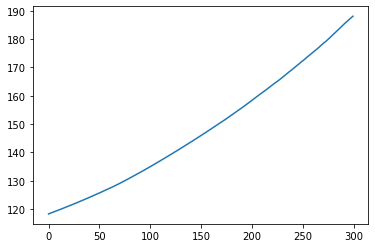

In [140]:
plt.plot(ep,Jw)
plt.show()

In [143]:
#increasing learning rate   
w1,w2, Jw,cost,ep= gradient_descent_stochastique(X, y1, w1,w2) 

# Affichage des résultats produits par la fonction gradient_descent
print('w1 final =', w1)
# print('w2 final =', w2)
print('Jw initial =', Jw[0])

epoch 0 == cost 188.48142062721374
epoch 10 == cost 206.40166759800692
epoch 20 == cost 173.24515787382066
epoch 30 == cost 116.01519668843072
epoch 40 == cost 71.27482233093734
epoch 50 == cost 46.775612124460075
epoch 60 == cost 35.148883808001536
epoch 70 == cost 28.326852884327863
epoch 80 == cost 23.36660724209464
epoch 90 == cost 20.20924614448311
epoch 100 == cost 17.857623641970168
epoch 110 == cost 15.900179447266007
epoch 120 == cost 14.48707480966517
epoch 130 == cost 13.396235631506078
epoch 140 == cost 12.344577559863554
epoch 150 == cost 11.362056205542116
epoch 160 == cost 10.696661086810275
epoch 170 == cost 9.893738591236161
epoch 180 == cost 9.292890256782755
epoch 190 == cost 8.704894129304222
epoch 200 == cost 8.348040531366104
epoch 210 == cost 8.104883919155528
epoch 220 == cost 7.832864244221303
epoch 230 == cost 7.579726511817785
epoch 240 == cost 7.225195670611966
epoch 250 == cost 7.083087564476766
epoch 260 == cost 6.938194426745036
epoch 270 == cost 6.766282

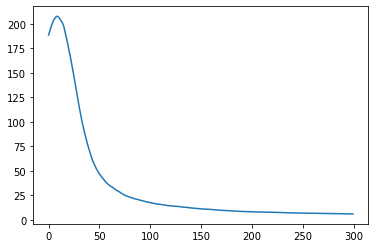

In [144]:
plt.plot(ep,Jw)
plt.show()

In [145]:
#2 trining the same last LR 
#increasing learning rate   
w1,w2, Jw,cost,ep= gradient_descent_stochastique(X, y1, w1,w2) 

# Affichage des résultats produits par la fonction gradient_descent
print('w1 final =', w1)
# print('w2 final =', w2)
print('Jw initial =', Jw[0])

epoch 0 == cost 6.23413946542035
epoch 10 == cost 6.028352389541646
epoch 20 == cost 5.844705134167756
epoch 30 == cost 5.610881271840143
epoch 40 == cost 5.495415077257773
epoch 50 == cost 5.330460298625274
epoch 60 == cost 5.260552736126238
epoch 70 == cost 5.189668498609135
epoch 80 == cost 4.973144014437256
epoch 90 == cost 4.851430187407659
epoch 100 == cost 4.77677608529861
epoch 110 == cost 4.677310716759798
epoch 120 == cost 4.552913058585574
epoch 130 == cost 4.403437804024186
epoch 140 == cost 4.252897932381068
epoch 150 == cost 4.197742103285466
epoch 160 == cost 4.1661628850700545
epoch 170 == cost 4.1100214996861615
epoch 180 == cost 4.029258489617596
epoch 190 == cost 3.923759250152973
epoch 200 == cost 3.74530409902687
epoch 210 == cost 3.73450290697125
epoch 220 == cost 3.651173494812486
epoch 230 == cost 3.51919664522894
epoch 240 == cost 3.4588329582214365
epoch 250 == cost 3.3499052278419623
epoch 260 == cost 3.2884495342450006
epoch 270 == cost 3.2267182625696114
ep

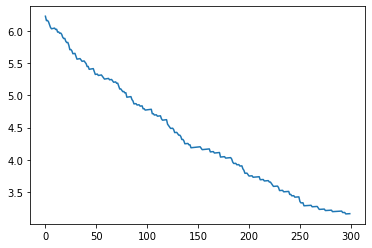

In [146]:
plt.plot(ep,Jw)
plt.show()

In [147]:
#3 trining the same last LR 
#increasing learning rate   
w1,w2, Jw,cost,ep= gradient_descent_stochastique(X, y1, w1,w2) 

# Affichage des résultats produits par la fonction gradient_descent
print('w1 final =', w1)
# print('w2 final =', w2)
print('Jw initial =', Jw[0])

epoch 0 == cost 3.160184396892181
epoch 10 == cost 3.0492668572616872
epoch 20 == cost 2.986075016130388
epoch 30 == cost 2.874441959381341
epoch 40 == cost 2.8587342482274973
epoch 50 == cost 2.8188001573340737
epoch 60 == cost 2.8027145794192827
epoch 70 == cost 2.7383491739975696
epoch 80 == cost 2.7218577764632212
epoch 90 == cost 2.6571109313731163
epoch 100 == cost 2.616169086603857
epoch 110 == cost 2.5750002879215126
epoch 120 == cost 2.533626804967136
epoch 130 == cost 2.516141929667826
epoch 140 == cost 2.4263404552683974
epoch 150 == cost 2.38435015880182
epoch 160 == cost 2.3662640007683238
epoch 170 == cost 2.3480473747643003
epoch 180 == cost 2.30563842372285
epoch 190 == cost 2.2870288345927867
epoch 200 == cost 2.2443114062049556
epoch 210 == cost 2.2254808575227485
epoch 220 == cost 2.1583815095404066
epoch 230 == cost 2.1391988794163304
epoch 240 == cost 2.0476522365486276
epoch 250 == cost 2.052131060827175
epoch 260 == cost 2.0084268999263943
epoch 270 == cost 1.964

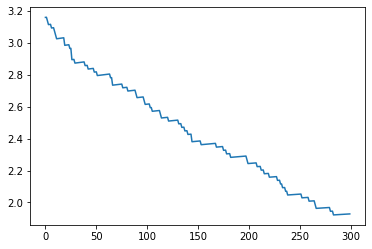

In [148]:
plt.plot(ep,Jw)
plt.show()